In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## 基本使用

#### MATLAB风格接口
Matplotlib 最初作为MATLAB 用户的Python 替代品， 许多语法都和MATLAB 类似。
MATLAB 风格的工具位于pyplot（plt）接口中。MATLAB 用户肯定对下面的代码特别熟
悉

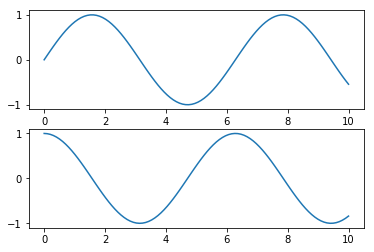

In [2]:
x = np.linspace(0, 10, 100)
# 创建两个子图中的第一个，设置坐标轴
plt.subplot(2, 1, 1) # (行、列、子图编号)
plt.plot(x, np.sin(x))
# 创建两个子图中的第二个，设置坐标轴
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

#### 面向对象接口
面向对象接口可以适应更复杂的场景，更好地控制你自己的图形。在面向对象接口中，画
图函数不再受到当前“活动”图形或坐标轴的限制，而变成了显式的Figure 和Axes 的方
法。通过下面的代码，可以用面向对象接口重新创建之前的图形

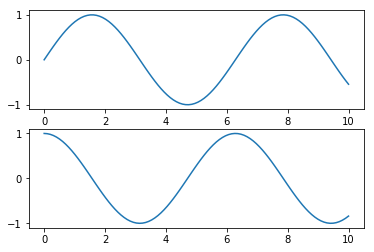

In [3]:
# 先创建图形网格
# ax是一个包含两个Axes对象的数组
fig, ax = plt.subplots(2)

# 在每个对象上调用plot()方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

虽然在画简单图形时，选择哪种绘图风格主要看个人喜好，但是在画比较复杂的图形时，
面向对象方法会更方便。

## 线图

#### 基本线图

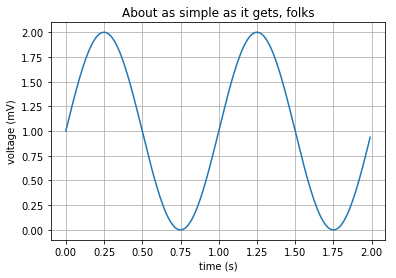

In [4]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
#plt.show()

#### 一个图中的多个子图

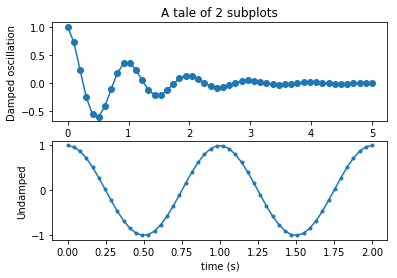

In [5]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [6]:
x1.shape,x2.shape

((50,), (50,))

## 直方图

In [7]:
data = np.random.randn(1000)
data.shape

(1000,)

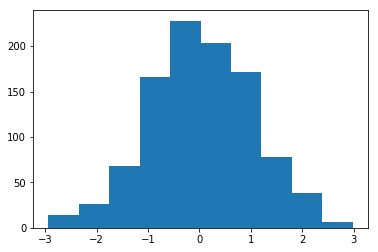

In [8]:

fig, ax = plt.subplots()

ax.hist(data)
plt.show()

## 饼图

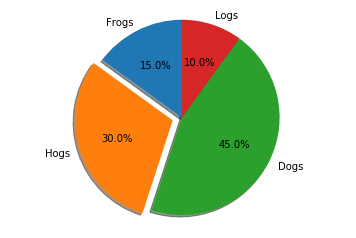

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 条形图

<BarContainer object of 5 artists>

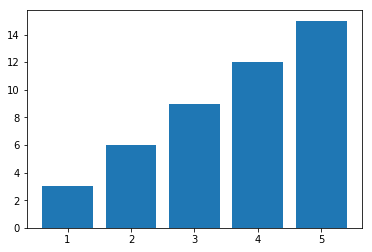

In [10]:
x = np.arange(1,6)

fig, ax = plt.subplots()
ax.bar(x,x*3)

## 散点图

#### 用plt.plot画散点图

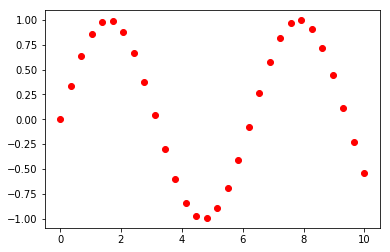

In [11]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

#plt.plot(x, y, 'o', color='black')
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='red')

#### 用plt.scatter画散点图

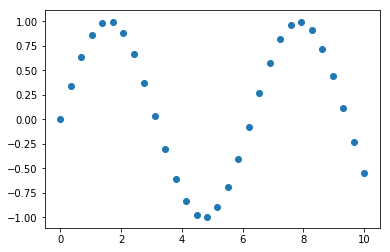

In [12]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

#plt.scatter(x, y)
fig, ax = plt.subplots()
ax.scatter(x, y)